In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

# Delta = actual-expected

In [2]:
f = open('radii.txt', 'r')
xpoints = []
xpoints2 = []
ypoints = []
azpoints = []
azpoints2 = []
deltaazpoints = []
for line in f:
    # Strips new line
    line = line[:-2]
    nums = line.split(', ')
    xpoints.append(float(nums[0]))
    xpoints2.append(float(nums[1]))
    ypoints.append(float(nums[2]))
    azpoints.append(float(nums[3]))
    azpoints2.append(float(nums[4]))
    if float(nums[5]) < -350:
        deltaazpoints.append(float(nums[5]) + 360)
    else:
        deltaazpoints.append(float(nums[5]))
f.close()  



[ -1.09462915e-04   2.43015359e-02   2.12329168e-01]


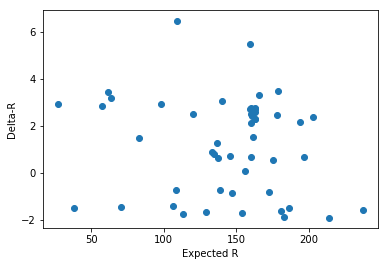

In [12]:
coeff = np.polyfit(xpoints2, ypoints,2)
print(coeff)

poly = np.poly1d(coeff)

plt.scatter(xpoints, ypoints)
plt.ylabel("Delta-R")
plt.xlabel("Expected R")

xp = np.linspace(0, 240, len(azpoints))

#plt.plot(xp, poly(xp), 'r')
plt.show()

[ -1.18182132e-04   2.42693898e-02   4.07252668e-01]


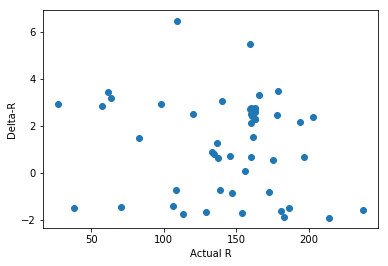

In [4]:
coeff = np.polyfit(xpoints, ypoints,2)
print(coeff)

poly = np.poly1d(coeff)

plt.scatter(xpoints, ypoints)
plt.ylabel("Delta-R")
plt.xlabel("Actual R")

xp = np.linspace(0, 240, len(azpoints))

#plt.plot(xp, poly(xp), 'r')
plt.show()

[  1.47015399e-04  -6.22322656e-02   5.78384674e+00]


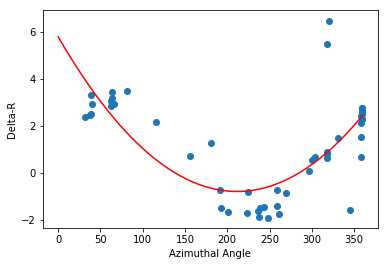

In [5]:
coeff = np.polyfit(azpoints, ypoints,2)
print(coeff)

def func(x,a,b,c,d):
    return a*np.cos(b*x + c) + d

poly = np.poly1d(coeff)

plt.scatter(azpoints, ypoints)
plt.ylabel("Delta-R")
plt.xlabel("Azimuthal Angle")

xp = np.linspace(0, 360, len(azpoints))

popt,pcov = curve_fit(func, azpoints, ypoints)

plt.plot(xp, poly(xp), 'r')
plt.show()

[  2.42586923e-05  -6.51836318e-03  -2.54334849e-01]


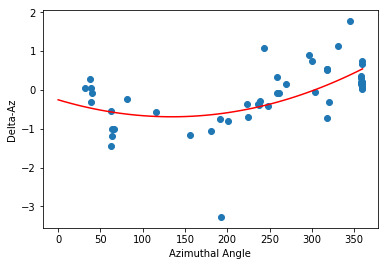

In [6]:
coeff = np.polyfit(azpoints, deltaazpoints,2)
print(coeff)

poly = np.poly1d(coeff)

plt.scatter(azpoints, deltaazpoints)
plt.ylabel("Delta-Az")
plt.xlabel("Azimuthal Angle")

xp = np.linspace(0, 360, len(azpoints))

plt.plot(xp, poly(xp), 'r')
plt.show()

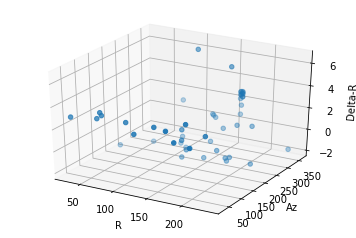

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xpoints, azpoints, ypoints)
ax.set_xlabel('R')
ax.set_ylabel('Az')
ax.set_zlabel('Delta-R')